In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Dividing data-set in train, validation and test set
To prevent overfitting, the training process consists of the following steps:
* Divide the data in a training, validation and test set. Use **train_test_split(X, y)**
* Use regularization
* Use cross-validation (specially useful when we have small datastes)
* If possible use lots of data (not always possible)

### Preprocessing & Pipelines
Additionally, some algorithm require that data is rescaled or normalized in some way. This is necesssary when certain features have a numerical range different than the rest of the features. 

In scikit-learn this can be achieved by using pipelines.

## Toy dataset from scikit-learn

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

(1797, 64)
[0 1 2 3 4 5 6 7 8 9]


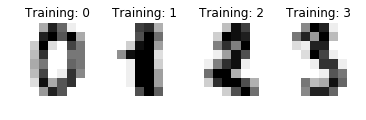

In [3]:
digits = load_digits()
print(digits.data.shape)
print(digits.target_names)


images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: {}'.format(label))

## Classification
Make a classification problem by using the median of each month then clasify stocks occording to if they are above or below the median for the next month

In [4]:
X = digits.images
y = digits.target

In [5]:
print(X.shape)
print(X.dtype)
print(y)
print(y.dtype)

(1797, 8, 8)
float64
[0 1 2 ..., 8 9 8]
int32


## Precission, recall, accuracy and f1-score

\begin{align}
\mathbf{Precision} &= \frac{tp}{tp + fp}\\
\mathbf{Recall} &= \frac{tp}{tp +fn}\\
\mathbf{Accuray} &= \frac{tp +tn}{tp+tn+fp+fn}\\
\mathbf{F}_1 &= 2\cdot \frac{precision \cdot recall}{precision + recall}
\end{align}

In [6]:
def run_classifier(model, xtrain, ytrain, xdev, ydev):
    model.fit(xtrain, ytrain)
    expected = ydev
    pred = model.predict(xdev)
    
    print('Cassification report for classifier \n{} \n{}'.format(
    model, metrics.classification_report(expected, pred)))
    print('')
    print('Confussion matrix \n{}'.format(
    metrics.confusion_matrix(expected, pred)))
    return model
    

In [7]:
# Often you want also to normalize data. This can be achieved by 
# using scalers and pipelines in scikit-learn.
# reshape data
n_samples = len(X)
X = X.reshape(n_samples, -1)
print(X.shape)

xtrain = X[:n_samples//2]
ytrain = y[:n_samples//2]

xdev = X[n_samples//2:]
ydev = y[n_samples//2:]

# Support vector machine
model_svm = svm.SVC(gamma=0.001)
model_svm = run_classifier(model_svm, xtrain, ytrain, xdev, ydev)

print('')
print('.' * 60)
print('')

# Random forest classifier
model_rfc = RandomForestClassifier()
model_rfc = run_classifier(model_rfc, xtrain, ytrain, xdev, ydev)

print('')
print('.' * 60)
print('')

# Gradient Boosting classifier
model_gbc = GradientBoostingClassifier()
model_gbc = run_classifier(model_gbc, xtrain, ytrain, xdev, ydev)

(1797, 64)
Cassification report for classifier 
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confussion matrix 
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [

# Natural Language Toolkit¶

NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.

Thanks to a hands-on guide introducing programming fundamentals alongside topics in computational linguistics, plus comprehensive API documentation, NLTK is suitable for linguists, engineers, students, educators, researchers, and industry users alike. NLTK is available for Windows, Mac OS X, and Linux. Best of all, NLTK is a free, open source, community-driven project.

NLTK has been called “a wonderful tool for teaching, and working in, computational linguistics using Python,” and “an amazing library to play with natural language.”

Natural Language Processing with Python provides a practical introduction to programming for language processing. Written by the creators of NLTK, it guides the reader through the fundamentals of writing Python programs, working with corpora, categorizing text, analyzing linguistic structure, and more. The online version of the book has been been updated for Python 3 and NLTK 3. (The original Python 2 version is still available at http://nltk.org/book_1ed.)

In [8]:
import nltk
from nltk.probability import *

In [9]:
text1 = ['no', 'good', 'fish', 'goes', 'anywhere', 'without', 'a', 'porpoise', '!']

In [10]:
text1

['no', 'good', 'fish', 'goes', 'anywhere', 'without', 'a', 'porpoise', '!']

In [11]:
corpus = nltk.corpus.brown.tagged_sents(categories='adventure')[:500]

In [12]:
len(corpus)

500

In [13]:
from nltk.util import unique_list

In [14]:
# We create a HMM trainer - note that we need the tags and symbols from the whole corpus, not just the training corpus
# get tags
tag_set = unique_list(tag for sent in corpus for(word, tag) in sent)
print('length of tag_set:', len(tag_set))

# get features
symbols = unique_list(word for sent in corpus for (word, tag) in sent)
print('length of symbols:', len(symbols))

trainer = nltk.tag.HiddenMarkovModelTrainer(tag_set, symbols)

train_corpus = []
test_corpus = []

# We divide the corpus into 90% training and 10% testing
for i in range(len(corpus)):
    if i % 10:
        train_corpus += [corpus[i]]
    else:
        test_corpus += [corpus[i]]

print('length of train-corpus:', len(train_corpus))
print('length of test-corpus:', len(test_corpus))



length of tag_set: 92
length of symbols: 1464
length of train-corpus: 450
length of test-corpus: 50


In [15]:
def train_and_test(est):
    hmm = trainer.train_supervised(train_corpus, estimator=est)
    print('{}%'.format(round(100 * hmm.evaluate(test_corpus), 2)))

### Maximum Likelihood Estimation

In [16]:
mle = lambda fd, bins: MLEProbDist(fd)
train_and_test(mle)

22.75%


In [17]:
train_and_test(LaplaceProbDist)

66.04%


## Sentiment analysis

In [18]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

C:\Users\gilbe\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Each document is represented by a tuple (sentence, label). The sentence is tokenized, so it is represented by a list of strings:

In [19]:
n_instances = 100
subj_docs = [(sent, 'subj') for sent in subjectivity.sents(categories='subj')[:n_instances]]
obj_docs = [(sent, 'obj') for sent in subjectivity.sents(categories='obj')[:n_instances]]
print('length subj_docs:', len(subj_docs),'length of obj_docs:', len(obj_docs))
print(subj_docs[0])

length subj_docs: 100 length of obj_docs: 100
(['smart', 'and', 'alert', ',', 'thirteen', 'conversations', 'about', 'one', 'thing', 'is', 'a', 'small', 'gem', '.'], 'subj')


### Train and test sets

Each document is a tuple (sentence, label). The setence is then tokenized, resulting in a list of strings.

Split separately the sentences in objective and subjective instances to keep a balanced uniform class distribution in both train and test sets.


In [20]:
train_subj_docs = subj_docs[:80]
test_subj_docs = subj_docs[80:100]
train_obj_docs = obj_docs[:80]
test_obj_docs = obj_docs[80:100]
training_docs = train_subj_docs + train_obj_docs
testing_docs = test_subj_docs + test_obj_docs

In [21]:
sentim_analyzer = SentimentAnalyzer()
all_words_neg = sentim_analyzer.all_words([mark_negation(doc) for doc in training_docs])

## Use unigram word features. Handling negation

### n-gram definition from wikipedia:
In the fields of computational linguistics and probability, an n-gram is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. The n-grams typically are collected from a text or speech corpus. When the items are words, n-grams may also be called shingles[clarification needed].[1]

Using Latin numerical prefixes, an n-gram of size 1 is referred to as a "unigram"; size 2 is a "bigram" (or, less commonly, a "digram"); size 3 is a "trigram". English cardinal numbers are sometimes used, e.g., "four-gram", "five-gram", and so on. In computational biology, a polymer or oligomer of a known size is called a k-mer instead of an n-gram, with specific names using Greek numerical prefixes such as "monomer", "dimer", "trimer", "tetramer", "pentamer", etc., or English cardinal numbers, "one-mer", "two-mer", "three-mer", etc. 

In [22]:
unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)
sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)

In [23]:
# Apply features to obtain feature-value representation of our datasets
training_set = sentim_analyzer.apply_features(training_docs)
test_set = sentim_analyzer.apply_features(testing_docs)

In [24]:
trainer = NaiveBayesClassifier.train
classifier = sentim_analyzer.train(trainer, training_set)
for key, value in sorted(sentim_analyzer.evaluate(test_set).items()):
    print('{0}: {1}'.format(key, value))

Training classifier
Evaluating NaiveBayesClassifier results...
Accuracy: 0.8
F-measure [obj]: 0.8
F-measure [subj]: 0.8
Precision [obj]: 0.8
Precision [subj]: 0.8
Recall [obj]: 0.8
Recall [subj]: 0.8


## Text classification 
Using data set with sms spam and can be found in the link below
https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection#

In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import csv
import os
from utils.utils import PROJECT_DATA_DIR
import numpy as np

### Stemming and Lemmatization

For grammatical reasons, documents are going to use different forms of a word, such as organize, organizes, and organizing. Additionally, there are families of derivationally related words with similar meanings, such as democracy, democratic, and democratization. In many situations, it seems as if it would be useful for a search for one of these words to return documents that contain another word in the set.

The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form. For instance:

    am, are, is => be
    car, cars, car's, cars' => car 

The result of this mapping of text will be something like:

    the boy's cars are different colors =>
    the boy car be differ color 

However, the two words differ in their flavor. Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma . If confronted with the token saw, stemming might return just s, whereas lemmatization would attempt to return either see or saw depending on whether the use of the token was as a verb or a noun. The two may also differ in that stemming most commonly collapses derivationally related words, whereas lemmatization commonly only collapses the different inflectional forms of a lemma. Linguistic processing for stemming or lemmatization is often done by an additional plug-in component to the indexing process, and a number of such components exist, both commercial and open-source.

https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

In [26]:
def preprocessing(text):
    #text = text.decode('utf8')
    tokens = [word for sent in nltk.sent_tokenize(text) 
          for word in nltk.word_tokenize(sent)]
    
    # remove stopwords
    stop = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop]
    
    # remove words less than 3 letters
    tokens = [word for word in tokens if len(word) >= 3]
    tokens = [word.lower() for word in tokens]
    
    lmtzr = WordNetLemmatizer()
    
    tokens = [lmtzr.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text
    

In [27]:
# put data in code folder
smsdata = open('smsspamcollection')

In [28]:
sms_data = []
sms_labels = []
csv_reader = csv.reader(smsdata, delimiter='\t')

for line in csv_reader:
    print(line[:3])
    sms_labels.append(line[0])
    sms_data.append(preprocessing(line[1]))
smsdata.close()

['ham', 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...']
['ham', 'Ok lar... Joking wif u oni...']
['spam', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
['ham', 'U dun say so early hor... U c already then say...']
['ham', "Nah I don't think he goes to usf, he lives around here though"]
['spam', "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv"]
['ham', 'Even my brother is not like to speak with me. They treat me like aids patent.']
['ham', "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"]
['spam', 'WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim 

['ham', "Sorry to be a pain. Is it ok if we meet another night? I spent late afternoon in casualty and that means i haven't done any of y stuff42moro and that includes all my time sheets and that. Sorry. "]
['ham', 'Smile in Pleasure Smile in Pain Smile when trouble pours like Rain Smile when sum1 Hurts U Smile becoz SOMEONE still Loves to see u Smiling!!']
['spam', 'Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed Â£1000 cash or Â£5000 prize!']
['ham', 'Havent planning to buy later. I check already lido only got 530 show in e afternoon. U finish work already?']
['spam', 'Your free ringtone is waiting to be collected. Simply text the password "MIX" to 85069 to verify. Get Usher and Britney. FML, PO Box 5249, MK17 92H. 450Ppw 16']
['ham', 'Watching telugu movie..wat abt u?']
['ham', 'i see. When we finish we have loads of loans to pay']
['ham', 'Hi. Wk been ok - on hols now! Yes on for a bit of a run. Forgot that i have haird

['ham', 'Where are you?when wil you reach here?']
['ham', "New Theory: Argument wins d SITUATION, but loses the PERSON. So dont argue with ur friends just.. . . . kick them &amp; say, I'm always correct.!"]
['spam', 'U 447801259231 have a secret admirer who is looking 2 make contact with U-find out who they R*reveal who thinks UR so special-call on 09058094597']
['ham', 'Tomarrow final hearing on my laptop case so i cant.']
['ham', 'PLEASSSSSSSEEEEEE TEL ME V AVENT DONE SPORTSx']
['ham', 'Okay. No no, just shining on. That was meant to be signing, but that sounds better.']
['ham', "Although i told u dat i'm into baig face watches now but i really like e watch u gave cos it's fr u. Thanx 4 everything dat u've done today, i'm touched..."]
['ham', "U don't remember that old commercial?"]
['ham', "Too late. I said i have the website. I didn't i have or dont have the slippers"]
['ham', 'I asked you to call him now ok']
['ham', 'Kallis wont bat in 2nd innings.']
['ham', 'It didnt work again 

['ham', "I'm going for bath will msg you next  &lt;#&gt;  min.."]
['ham', 'I cant keep talking to people if am not sure i can pay them if they agree to price. So pls tell me what you want to really buy and how much you are willing to pay']
['spam', 'Thanks for your Ringtone Order, Reference T91. You will be charged GBP 4 per week. You can unsubscribe at anytime by calling customer services on 09057039994']
['ham', 'Can you say what happen']
['ham', "You could have seen me..i did't recognise you Face.:)"]
['ham', "Well there's not a lot of things happening in Lindsay on New years *sighs* Some bars in Ptbo and the blue heron has something going"]
['ham', 'Keep my payasam there if rinu brings']
['ham', 'I taught that Ranjith sir called me. So only i sms like that. Becaus hes verifying about project. Prabu told today so only pa dont mistake me..']
['ham', "I guess that's why you re worried. You must know that there's a way the body repairs itself. And i'm quite sure you shouldn't worry. We

['ham', 'Kate jackson rec center before 7ish, right?']
['ham', 'Dear i have reache room']
['ham', 'Fighting with the world is easy, u either win or lose bt fightng with some1 who is close to u is dificult if u lose - u lose if u win - u still lose.']
['ham', 'When can Ã¼ come out?']
['ham', 'Check with nuerologist.']
['ham', 'Lolnice. I went from a fish to ..water.?']
['spam', "+123 Congratulations - in this week's competition draw u have won the Â£1450 prize to claim just call 09050002311 b4280703. T&Cs/stop SMS 08718727868. Over 18 only 150ppm"]
['ham', "No it's waiting in e car dat's bored wat. Cos wait outside got nothing 2 do. At home can do my stuff or watch tv wat."]
['ham', 'Maybe westshore or hyde park village, the place near my house?']
['ham', "You should know now. So how's anthony. Are you bringing money. I've school fees to pay and rent and stuff like that. Thats why i need your help. A friend in need....|"]
['ham', "What's the significance?"]
['ham', 'Your opinion about m

['spam', 'New TEXTBUDDY Chat 2 horny guys in ur area 4 just 25p Free 2 receive Search postcode or at gaytextbuddy.com. TXT ONE name to 89693']
['spam', 'Todays Vodafone numbers ending with 4882 are selected to a receive a Â£350 award. If your number matches call 09064019014 to receive your Â£350 award.']
['ham', 'Please dont say like that. Hi hi hi']
['ham', 'Thank u!']
['ham', 'Oh that was a forwarded message. I thought you send that to me']
['ham', 'Got it. Seventeen pounds for seven hundred ml â€“ hope ok.']
['spam', 'Dear Voucher Holder, 2 claim this weeks offer, at your PC go to http://www.e-tlp.co.uk/expressoffer Ts&Cs apply.2 stop texts txt STOP to 80062.']
['ham', 'Me n him so funny...']
['ham', 'Sweetheart, hope you are not having that kind of day! Have one with loads of reasons to smile. Biola']
['ham', 'When Ã¼ login dat time... Dad fetching Ã¼ home now?']
['ham', 'What will we do in the shower, baby?']
['ham', 'I had askd u a question some hours before. Its answer']
['ham',

['spam', 'Romantic Paris. 2 nights, 2 flights from Â£79 Book now 4 next year. Call 08704439680Ts&Cs apply.']
['ham', 'We are at grandmas. Oh dear, u still ill? I felt Shit this morning but i think i am just hungover! Another night then. We leave on sat.']
['spam', 'Urgent Ur Â£500 guaranteed award is still unclaimed! Call 09066368327 NOW closingdate04/09/02 claimcode M39M51 Â£1.50pmmorefrommobile2Bremoved-MobyPOBox734LS27YF']
['ham', 'Nothing but we jus tot u would ask cos u ba gua... But we went mt faber yest... Yest jus went out already mah so today not going out... Jus call lor...']
['ham', 'Wishing you and your family Merry "X" mas and HAPPY NEW Year in advance..']
['spam', 'UR awarded a City Break and could WIN a Â£200 Summer Shopping spree every WK. Txt STORE to 88039 . SkilGme. TsCs087147403231Winawk!Age16 Â£1.50perWKsub']
['ham', "I'm nt goin, got somethin on, unless they meetin 4 dinner lor... Haha, i wonder who will go tis time..."]
['ham', "Sorry, I'll call later"]
['ham', '

['ham', 'Are you in castor? You need to see something']
['spam', 'Sunshine Quiz Wkly Q! Win a top Sony DVD player if u know which country Liverpool played in mid week? Txt ansr to 82277. Â£1.50 SP:Tyrone']
['spam', 'U have a secret admirer who is looking 2 make contact with U-find out who they R*reveal who thinks UR so special-call on 09058094565']
['spam', 'U have a Secret Admirer who is looking 2 make contact with U-find out who they R*reveal who thinks UR so special-call on 09065171142-stopsms-08']
['spam', 'Reminder: You have not downloaded the content you have already paid for. Goto http://doit. mymoby. tv/ to collect your content.']
['ham', "see, i knew giving you a break a few times woul lead to you always wanting to miss curfew. I was gonna gibe you 'til one, but a MIDNIGHT movie is not gonna get out til after 2. You need to come home. You need to getsleep and, if anything, you need to b studdying ear training."]
['ham', 'I love to give massages. I use lots of baby oil... What 

['ham', 'Lol I would but my mom would have a fit and tell the whole family how crazy and terrible I am']
['ham', 'I just got home babe, are you still awake ?']
['ham', 'I dunno they close oredi not... Ãœ v ma fan...']
['ham', 'Just buy a pizza. Meat lovers or supreme. U get to pick.']
['ham', 'Ya, told..she was asking wats matter?']
['ham', 'Dear,regret i cudnt pick call.drove down frm ctla now at cochin home.left mobile in car..ente style ishtamayoo?happy bakrid!']
['spam', 'FREE for 1st week! No1 Nokia tone 4 ur mob every week just txt NOKIA to 8007 Get txting and tell ur mates www.getzed.co.uk POBox 36504 W45WQ norm150p/tone 16+']
['ham', 'Shall i send that exe to your mail id.']
['ham', 'Nope watching tv at home... Not going out. V bored...']
['ham', 'Don know..wait i will check it.']
['ham', 'Good afternoon on this glorious anniversary day, my sweet J !! I hope this finds you happy and content, my Prey. I think of you and send a teasing kiss from across the sea coaxing images of f

['ham', 'Yun buying... But school got offer 2000 plus only...']
['ham', 'You sure your neighbors didnt pick it up']
['ham', 'K. I will sent it again']
['spam', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
['ham', "New Theory: Argument wins d SITUATION, but loses the PERSON. So dont argue with ur friends just.. . . . kick them &amp; say, I'm always correct.!"]
['ham', 'Well. Im computerless. Time to make some oreo truffles']
['ham', 'Haha yeah I see that now, be there in a sec']
['ham', 'I am not having her number sir']
['ham', "Lol now I'm after that hot air balloon!"]
['ham', 'Ok . . now i am in bus. . If i come soon i will come otherwise tomorrow']
['ham', 'Msgs r not time pass.They silently say that I am thinking of U right now and also making U think of me at least 4 a moment. Gd nt.swt drms @Shesil']
['ham', 'Yeah, we can probably swing by once my roommate finishes up 

['ham', "Great to hear you are settling well. So what's happenin wit ola?"]
['ham', 'Those cocksuckers. If it makes you feel better ipads are worthless garbage novelty items and you should feel bad for even wanting one']
['ham', 'I tot u reach liao. He said t-shirt.']
['ham', 'FRAN I DECIDED 2 GO N E WAY IM COMPLETELY BROKE AN KNACKERED I GOT UP BOUT 3 C U 2MRW LOVE JANX P.S THIS IS MY DADS FONE, -NO CREDIT']
['ham', 'I cant pick the phone right now. Pls send a message']
['ham', "Your right! I'll make the appointment right now."]
['ham', 'Designation is software developer and may be she get chennai:)']
['spam', 'Enjoy the jamster videosound gold club with your credits for 2 new videosounds+2 logos+musicnews! get more fun from jamster.co.uk! 16+only Help? call: 09701213186 ']
['spam', 'Get 3 Lions England tone, reply lionm 4 mono or lionp 4 poly. 4 more go 2 www.ringtones.co.uk, the original n best. Tones 3GBP network operator rates apply']
['ham', 'I jokin oni lar.. Ãœ busy then i wun 

['ham', 'You have registered Sinco as Payee. Log in at icicibank.com and enter URN  &lt;#&gt;  to confirm. Beware of frauds. Do NOT share or disclose URN to anyone.']
['ham', 'cool. We will have fun practicing making babies!']
['ham', 'Actually getting ready to leave the house.']
['ham', 'K..k..any special today?']
['spam', 'URGENT, IMPORTANT INFORMATION FOR O2 USER. TODAY IS YOUR LUCKY DAY! 2 FIND OUT WHY LOG ONTO HTTP://WWW.URAWINNER.COM THERE IS A FANTASTIC SURPRISE AWAITING FOR YOU']
['ham', 'Then we gotta do it after that']
['ham', "I've got ten bucks, jay is being noncomittal"]
['ham', 'Where at were hungry too']
['ham', 'Pls speak to that customer machan.']
['ham', 'somewhere out there beneath the pale moon light someone think in of u some where out there where dreams come true... goodnite &amp; sweet dreams']
['ham', 'Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... 

['ham', 'Now press conference da:)']
['spam', "Hello from Orange. For 1 month's free access to games, news and sport, plus 10 free texts and 20 photo messages, reply YES. Terms apply: www.orange.co.uk/ow"]
['ham', 'After completed degree. There is no use in joining finance.']
['ham', 'Good afternoon, my love ! Any job prospects ? Are you missing me ? What do you do ? Are you being lazy and bleak, hmmm ? Or happy and filled with my love ?']
['ham', 'Shant disturb u anymore... Jia you...']
['ham', 'Bishan lar nearer... No need buy so early cos if buy now i gotta park my car...']
['ham', 'Me, i dont know again oh']
['ham', 'Dude sux for snake. He got old and raiden got buff']
['ham', 'He says hi and to get your ass back to south tampa (preferably at a kegger)']
['ham', 'In e msg jus now. U said thanks for gift.']
['ham', 'U too...']
['ham', 'Ok how you dear. Did you call chechi']
['ham', 'Yeah we do totes. When u wanna?']
['ham', 'Ok i found dis pierre cardin one which looks normal costs 

['ham', 'S but mostly not like that.']
['ham', 'Ãœ v ma fan...']
['ham', "Dunno cos i was v late n when i reach they inside already... But we ate spageddies lor... It's e gals who r laughing at me lor..."]
['ham', 'Guess who spent all last night phasing in and out of the fourth dimension']
['ham', 'So now my dad is gonna call after he gets out of work and ask all these crazy questions.']
['ham', 'Yes..but they said its IT.,']
['ham', 'Very hurting n meaningful lines ever: "I compromised everything for my love, But at d end my love compromised me for everything:-(".. Gud mornin:-)']
['ham', 'Lmao!nice 1']
['ham', 'Glad to see your reply.']
['spam', 'URGENT! We are trying to contact U. Todays draw shows that you have won a Â£800 prize GUARANTEED. Call 09050001295 from land line. Claim A21. Valid 12hrs only']
['spam', 'Monthly password for wap. mobsi.com is 391784. Use your wap phone not PC.']
['ham', 'Nah dub but je still buff']
['ham', 'Painful words- "I thought being Happy was the most

['ham', 'Do you know why god created gap between your fingers..? So that, One who is made for you comes &amp; fills those gaps by holding your hand with LOVE..!']
['ham', 'Yes:)sura in sun tv.:)lol.']
['ham', 'Arun can u transfr me d amt']
['ham', "Takin a shower now but yeah I'll leave when I'm done"]
['ham', 'Am not working but am up to eyes in philosophy so will text u later when a bit more free for chat...']
['ham', 'U havenÂ’t lost me ill always b here 4u.i didnÂ’t intend 2 hurt u but I never knew how u felt about me when Iwas+marine&thatÂ’s what itried2tell urmom.i careabout u']
['spam', 'WIN: We have a winner! Mr. T. Foley won an iPod! More exciting prizes soon, so keep an eye on ur mobile or visit www.win-82050.co.uk']
['ham', 'You bad girl. I can still remember them']
['ham', 'How much i gave to you. Morning.']
['ham', 'I hope your alright babe? I worry that you might have felt a bit desparate when you learned the job was a fake ? I am here waiting when you come back, my love'

['ham', 'We don call like  &lt;#&gt;  times oh. No give us hypertension oh.']
['ham', "Dont give a monkeys wot they think and i certainly don't mind. Any friend of mine&all that! Just don't sleep wiv , that wud be annoyin!"]
['ham', 'Omg it could snow here tonite!']
['spam', 'Call from 08702490080 - tells u 2 call 09066358152 to claim Â£5000 prize. U have 2 enter all ur mobile & personal details @ the prompts. Careful!']
['spam', 'Free 1st week entry 2 TEXTPOD 4 a chance 2 win 40GB iPod or Â£250 cash every wk. Txt VPOD to 81303 Ts&Cs www.textpod.net custcare 08712405020.']
['ham', 'Carry on not disturbing both of you']
['ham', 'What pa tell me.. I went to bath:-)']
['ham', 'Jus finished avatar nigro']
['ham', 'R u over scratching it?']
['ham', 'Hope you are having a great day.']
['ham', "Did either of you have any idea's? Do you know of anyplaces doing something?"]
['ham', 'My planning usually stops at "find hella weed, smoke hella weed"']
['ham', 'The fact that you\'re cleaning shows 

['spam', 'Call 09094100151 to use ur mins! Calls cast 10p/min (mob vary). Service provided by AOM, just GBP5/month. AOM Box61,M60 1ER until u stop. Ages 18+ only!']
['ham', 'Oh... I was thkin of goin yogasana at 10 den no nd to go at 3 den can rush to parco 4 nb... Okie lor, u call me when ready...']
['ham', 'Y so late but i need to go n get da laptop...']
['ham', 'Sir, I am waiting for your mail.']
['ham', '.Please charge my mobile when you get up in morning.']
['ham', 'Nothing, i got msg frm tht unknown no..']
['ham', "Ugh fuck it I'm resubbing to eve"]
['ham', "He didn't see his shadow. We get an early spring yay"]
['ham', 'I did. One slice and one breadstick. Lol']
['ham', 'Hey ! I want you ! I crave you ! I miss you ! I need you ! I love you, Ahmad Saeed al Hallaq ...']
['ham', 'Is there any training tomorrow?']
['spam', 'URGENT! Your mobile No *********** WON a Â£2,000 Bonus Caller Prize on 02/06/03! This is the 2nd attempt to reach YOU! Call 09066362220 ASAP! BOX97N7QP, 150ppm']

['ham', 'Yavnt tried yet and never played original either']
['ham', 'Hiya, had a good day? Have you spoken to since the weekend?']
['ham', 'See? I thought it all through']
['ham', "I'm at work. Please call"]
['ham', 'get ready to moan and scream :)']
['ham', 'Oh k :)why you got job then whats up?']
['ham', "I don,t think so. You don't need to be going out that late on a school night. ESPECIALLY when the one class you have is the one you missed last wednesday and probably failed a test in on friday"]
['ham', 'And popping &lt;#&gt; ibuprofens was no help.']
['ham', 'Babe ! How goes that day ? What are you doing ? Where are you ? I sip my cappuccino and think of you, my love ... I send a kiss to you from across the sea']
['ham', 'Ok.']
['ham', 'PS U no ur a grown up now right?']
['ham', 'Chinatown got porridge, claypot rice, yam cake, fishhead beehoon... Either we eat cheap den go cafe n tok or go nydc or somethin...']
['ham', 'I know a few people I can hit up and fuck to the yes']
['ham'

['spam', 'You have won a Nokia 7250i. This is what you get when you win our FREE auction. To take part send Nokia to 86021 now. HG/Suite342/2Lands Row/W1JHL 16+ ']
['spam', 'Congratulations! Thanks to a good friend U have WON the Â£2,000 Xmas prize. 2 claim is easy, just call 08718726971 NOW! Only 10p per minute. BT-national-rate.']
['spam', 'tddnewsletter@emc1.co.uk (More games from TheDailyDraw) Dear Helen, Dozens of Free Games - with great prizesWith..']
['ham', 'So what do you guys do.']
['ham', "Also that chat was awesome but don't make it regular unless you can see her in person"]
['ham', "That's significant but dont worry."]
['ham', "That's cause your old. I live to be high."]
['ham', 'Waqt se pehle or naseeb se zyada kisi ko kuch nahi milta,Zindgi wo nahi he jo hum sochte hai Zindgi wo hai jo ham jeetey hai..........']
['ham', 'On the way to office da..']
['ham', 'In which place do you want da.']
['ham', "This pain couldn't have come at a worse time."]
['ham', 'Ok...']
['ham', 

['ham', 'How was txting and driving']
['ham', "That's good. Lets thank God. Please complete the drug. Have lots of water. And have a beautiful day."]
['ham', 'Really dun bluff me leh... U sleep early too. Nite...']
['ham', 'Indians r poor but India is not a poor country. Says one of the swiss bank directors. He says that " &lt;#&gt;  lac crore" of Indian money is deposited in swiss banks which can be used for \'taxless\' budget for  &lt;#&gt;  yrs. Can give  &lt;#&gt;  crore jobs to all Indians. From any village to Delhi 4 lane roads. Forever free power suply to more than  &lt;#&gt;  social projects. Every citizen can get monthly  &lt;#&gt; /- for  &lt;#&gt;  yrs. No need of World Bank &amp; IMF loan. Think how our money is blocked by rich politicians. We have full rights against corrupt politicians. Itna forward karo ki pura INDIA padhe.g.m."']
['ham', 'Uncle boye. I need movies oh. Guide me. Plus you know torrents are not particularly legal here. And the system is slowing down. What 

['ham', 'Are you still getting the goods.']
['ham', 'And maybe some pressies']
['ham', "Yeah I am, so I'll leave maybe 7ish?"]
['ham', "K..k..i'm also fine:)when will you complete the course?"]
['ham', "Under the sea, there lays a rock. In the rock, there is an envelope. In the envelope, there is a paper. On the paper, there are 3 words... '"]
['ham', "I told her I had a Dr appt next week. She thinks I'm gonna die. I told her its just a check. Nothing to be worried about. But she didn't listen."]
['ham', 'You in your room? I need a few']
['ham', 'I dont want to hear anything']
['ham', 'Hey. For me there is no leave on friday. Wait i will ask my superior and tell you..']
['ham', 'Ultimately tor motive tui achieve korli.']
['ham', 'From 5 to 2 only my work timing.']
['ham', 'â€¦ and donâ€˜t worry weâ€˜ll have finished by march â€¦ ish!']
['ham', 'The house is on the water with a dock, a boat rolled up with a newscaster who dabbles in jazz flute behind the wheel']
['spam', 'Congrats 2 mob

['ham', 'Okie']
['ham', 'Yes I know the cheesy songs from frosty the snowman :)']
['ham', 'Ya ok, vikky vl c witin  &lt;#&gt; mins and il reply u..']
['spam', 'sports fans - get the latest sports news str* 2 ur mobile 1 wk FREE PLUS a FREE TONE Txt SPORT ON to 8007 www.getzed.co.uk 0870141701216+ norm 4txt/120p ']
['ham', 'Hey tmr meet at bugis 930 ?']
['spam', 'Urgent Urgent! We have 800 FREE flights to Europe to give away, call B4 10th Sept & take a friend 4 FREE. Call now to claim on 09050000555. BA128NNFWFLY150ppm']
['ham', 'All these nice new shirts and the only thing I can wear them to is nudist themed ;_; you in mu?']
['ham', 'Hey sexy buns! What of that day? No word from you this morning on YM ... :-( ... I think of you']
['ham', 'And whenever you and i see we can still hook up too.']
['ham', "Nope but i'm going home now then go pump petrol lor... Like going 2 rain soon..."]
['ham', 'Can you use foreign stamps for whatever you send them off for? ']
['spam', 'FROM 88066 LOST Â£1

['ham', 'Wife.how she knew the time of murder exactly']
['spam', 'Send a logo 2 ur lover - 2 names joined by a heart. Txt LOVE NAME1 NAME2 MOBNO eg LOVE ADAM EVE 07123456789 to 87077 Yahoo! POBox36504W45WQ TxtNO 4 no ads 150p.']
['ham', 'Howz that persons story']
['ham', 'Thanx 4 sending me home...']
['ham', 'Its normally hot mail. Com you see!']
['spam', "You've won tkts to the EURO2004 CUP FINAL or Â£800 CASH, to collect CALL 09058099801 b4190604, POBOX 7876150ppm"]
['ham', 'U sick still can go shopping?']
['ham', 'Ya they are well and fine., BBD(pooja) full pimples..even she become quite black..and ur rite here its too cold, wearing sweatter..']
['ham', 'Nice.nice.how is it working?']
['ham', "1's reach home call me."]
['ham', 'Were trying to find a Chinese food place around here']
['ham', 'Easy mate, * guess the quick drink was bit ambitious.']
['ham', "BABE !!! I miiiiiiissssssssss you ! I need you !!! I crave you !!! :-( ... Geeee ... I'm so sad without you babe ... I love you ..

['ham', "Hey babe, sorry i didn't get sooner. Gary can come and fix it cause he thinks he knows what it is but he doesn't go as far a Ptbo and he says it will cost  &lt;#&gt;  bucks. I don't know if it might be cheaper to find someone there ? We don't have any second hand machines at all right now, let me know what you want to do babe"]
['ham', 'make that 3! 4 fucks sake?! x']
['ham', 'Leave it. U will always be ignorant.']
['ham', "Nope but i'll b going 2 sch on fri quite early lor cos mys sis got paper in da morn :-)"]
['ham', 'at bruce b downs &amp; fletcher now']
['ham', 'Where are you ? You said you would be here when I woke ... :-(']
['ham', 'Hey now am free you can call me.']
['ham', 'Tell me whos this pls:-)']
['spam', 'URGENT! Your mobile was awarded a Â£1,500 Bonus Caller Prize on 27/6/03. Our final attempt 2 contact U! Call 08714714011']
['ham', 'Think i might have to give it a miss. Am teaching til twelve, then have lecture at two. Damn this working thing.']
['ham', "Id hav

['ham', 'Webpage s not available!']
['ham', "Just woke up. Yeesh its late. But I didn't fall asleep til &lt;#&gt; am :/"]
['spam', 'You are now unsubscribed all services. Get tons of sexy babes or hunks straight to your phone! go to http://gotbabes.co.uk. No subscriptions.']
['ham', 'Dear all, as we know  &lt;#&gt; th is the  &lt;#&gt; th birthday of our loving Gopalettan. We are planning to give a small gift on that day. Those who like to participate in that you are welcome. Please contact our admin team for more details']
['ham', 'K..k...from tomorrow onwards started ah?']
['ham', "What u talking bout early morning? It's almost noon where your at!"]
['ham', 'Fine. Do you remember me.']
['spam', 'Hi babe its Jordan, how r u? Im home from abroad and lonely, text me back if u wanna chat xxSP visionsms.com Text stop to stopCost 150p 08712400603']
['ham', 'Ok. How many should i buy.']
['ham', 'Sounds good, keep me posted']
['spam', 'Get a brand new mobile phone by being an agent of The Mo

['ham', 'Great. P diddy is my neighbor and comes for toothpaste every morning']
['ham', 'I av a new number,  . Wil u only use this one,ta.']
['ham', 'So its to be poking man everyday that they teach you in canada abi! How are you. Just saying hi.']
['ham', '7 lor... Change 2 suntec... Wat time u coming?']
['ham', 'No de.am seeing in online shop so that i asked.']
['ham', 'Just curious because my cuz asked what I was up to']
['ham', 'Nice.nice.how is it working?']
['ham', 'Okay lor... Wah... like that def they wont let us go... Haha... What did they say in the terms and conditions?']
['ham', 'Haha... Yup hopefully  we will lose a few kg by mon. after hip hop can go orchard and weigh again']
['ham', "She's good. How are you. Where r u working now"]
['ham', "Oh, yes, I've just been a little under the weather so i've kind of been coccooning at home"]
['ham', 'At home also.']
['ham', 'This phone has the weirdest auto correct.']
['ham', "Oops my phone died and I didn't even know. Yeah I like

['ham', 'At what time are you coming.']
['ham', 'Call him and say you not coming today ok and tell them not to fool me like this ok']
['ham', 'I emailed yifeng my part oredi.. Can Ã¼ get it fr him..']
['ham', "R u sure they'll understand that! Wine * good idea just had a slurp!"]
['ham', 'Minimum walk is 3miles a day.']
['ham', 'Ok not a problem will get them a taxi. C ing  tomorrow and tuesday. On tuesday think we r all going to the cinema. ']
['ham', 'Brainless Baby Doll..:-D;-), vehicle sariyag drive madoke barolla..']
['ham', "I don't run away frm u... I walk slowly &amp; it kills me that u don't care enough to stop me..."]
['spam', "Sorry I missed your call let's talk when you have the time. I'm on 07090201529"]
['ham', 'Please attend the phone:)']
['ham', 'You only hate me. You can call any but you didnt accept even a single call of mine. Or even you messaged']
['ham', "No messages on her phone. I'm holding it now"]
['ham', "Can... I'm free..."]
['ham', 'Yo my trip got postponed,

['ham', "says the  &lt;#&gt;  year old with a man and money. I'm down to my last  &lt;#&gt; . Still waiting for that check."]
['ham', 'I will come to ur home now']
['ham', 'Free any day but i finish at 6 on mon n thurs...']
['ham', 'Will you be here for food']
['ham', 'life alle mone,eppolum oru pole allalo']
['ham', 'Nite...']
['ham', 'Two fundamentals of cool life: "Walk, like you are the KING"...! OR "Walk like you Dont care,whoever is the KING"!... Gud nyt']
['ham', 'Camera quite good, 10.1mega pixels, 3optical and 5digital dooms. Have a lovely holiday, be safe and i hope you hav a good journey! Happy new year to you both! See you in a couple of weeks! ']
['ham', 'Hi Petey!noiÂ’m ok just wanted 2 chat coz avent spoken 2 u 4 a long time-hope ur doin alrite.have good nit at js love ya am.x']
['ham', 'I just saw ron burgundy captaining a party boat so yeah']
['ham', "I'm serious. You are in the money base"]
['ham', 'Already one guy loving you:-.']
['ham', 'Staff of placement training 

['ham', 'ME 2 BABE I FEEL THE SAME LETS JUST 4GET ABOUT IT+BOTH TRY +CHEER UP+NOT FIT SOO MUCHXXLOVE U LOCAXX']
['ham', 'You know what hook up means right?']
['spam', 'Customer service announcement. We recently tried to make a delivery to you but were unable to do so, please call 07090298926 to re-schedule. Ref:9307622']
['ham', "Wat's da model num of ur phone?"]
['ham', "He's really into skateboarding now despite the fact that he gets thrown off of it and winds up with bandages and shit all over his arms every five minutes"]
['spam', 'You can stop further club tones by replying "STOP MIX" See my-tone.com/enjoy. html for terms. Club tones cost GBP4.50/week. MFL, PO Box 1146 MK45 2WT (2/3)']
['ham', 'My house here e sky quite dark liao... If raining then got excuse not 2 run already rite... Hee...']
['ham', "Sorry, left phone upstairs. OK, might be hectic but would be all my birds with one fell swoop. It's a date."]
['ham', "* Thought I didn't see you."]
['spam', 'wamma get laid?want re

['ham', 'Yes.mum lookin strong:)']
['ham', 'Sir Goodmorning, Once free call me.']
['ham', 'Where are you call me.']
['ham', 'Was gr8 to see that message. So when r u leaving? Congrats dear. What school and wat r ur plans.']
['ham', 'Love it! The girls at the office may wonder why you are smiling but sore...']
['ham', 'Hi, wlcome back, did wonder if you got eaten by a lion or something, nothing much']
['ham', 'Does uncle timi help in clearing cars']
['ham', 'I came hostel. I m going to sleep. Plz call me up before class. Hrishi.']
['ham', 'Ok... But bag again..']
['ham', "Hi! You just spoke to MANEESHA V. We'd like to know if you were satisfied with the experience. Reply Toll Free with Yes or No."]
['ham', 'Ok lor. Msg me b4 u call.']
['spam', 'Mila, age23, blonde, new in UK. I look sex with UK guys. if u like fun with me. Text MTALK to 69866.18 . 30pp/txt 1st 5free. Â£1.50 increments. Help08718728876']
['ham', 'Once a fishrman woke early in d mrng. It was very dark. He waited a while &

['ham', 'THATÂ’S ALRITE GIRL, U KNOW GAIL IS NEVA WRONG!!TAKE CARE SWEET AND DONÂ’T WORRY.C U L8TR HUN!LOVE Yaxxx']
['ham', 'Theoretically yeah, he could be able to come']
['ham', "Alright we're hooked up, where you guys at"]
['ham', 'not that I know of, most people up here are still out of town']
['ham', 'No let me do the math. Your not good at it.']
['ham', 'Oh ok wait 4 me there... My lect havent finish']
['ham', "Yeah my usual guy's out of town but there're definitely people around I know"]
['ham', 'I am joining today formally.Pls keep praying.will talk later.']
['ham', 'Happy or sad , one thing about past is- "Its no more" GOOD MORNING :-):-).']
['ham', 'No. Did you multimedia message them or e-mail?']
['ham', 'Okie but i scared u say i fat... Then u dun wan me already...']
['ham', 'did u get that message']
['ham', 'Sorry sir, i will call you tomorrow.  senthil.hsbc']
['ham', 'What you need. You have a person to give na.']
['ham', 'She left it very vague. She just said she would i

['ham', 'Reason is if the team budget is available at last they buy the unsold players for at base rate..']
['ham', 'CERI U REBEL! SWEET DREAMZ ME LITTLE BUDDY!! C YA 2MORO! WHO NEEDS BLOKES']
['spam', 'ringtoneking 84484']
['ham', 'Huh i cant thk of more oredi how many pages do we have?']
['ham', 'His frens go then he in lor. Not alone wif my mum n sis lor.']
['ham', 'Nationwide auto centre (or something like that) on Newport road. I liked them there']
['ham', 'Hey, I missed you tm of last night as my phone was on the charge ... *smiles* ... I am meeting a friend shortly']
['ham', 'Whatever, juliana. Do whatever you want.']
['ham', "Friendship is not a game to play, It is not a word to say, It doesn\\'t start on March and ends on May, It is tomorrow, yesterday, today and e"]
['spam', 'Ringtone Club: Gr8 new polys direct to your mobile every week !']
['ham', 'Hello. Sort of out in town already. That . So dont rush home, I am eating nachos. Will let you know eta.']
['ham', 'Ok lor. Anyw

['ham', "Yunny... I'm goin to be late"]
['ham', "Doc prescribed me morphine cause the other pain meds aren't enough. Waiting for my mom to bring it. That med should kick in fast so I'm gonna try to be on later"]
['ham', 'Cool, want me to go to kappa or should I meet you outside mu']
['ham', 'Hey sexy buns ! Have I told you ? I adore you, loverboy. I hope you remember to thank your sister in law for those meatballs *grins* ... i love you, babe']
['ham', 'May b approve panalam...but it should have more posts..']
['spam', 'SPJanuary Male Sale! Hot Gay chat now cheaper, call 08709222922. National rate from 1.5p/min cheap to 7.8p/min peak! To stop texts call 08712460324 (10p/min)']
['ham', "Sorry, I'll call later"]
['ham', 'I dont thnk its a wrong calling between us']
['ham', "Me i'm not workin. Once i get job..."]
['ham', "And by when you're done I mean now"]
['ham', "Its Ur luck to Love someone. Its Ur fortune to Love the one who Loves U. But, its a miracle to Love a person who can't Love

['ham', 'Are you plans with your family set in stone ?']
['ham', 'Pls dont forget to study']
['ham', "You'll never believe this but i have actually got off at taunton. Wow"]
['ham', 'Den only weekdays got special price... Haiz... Cant eat liao... Cut nails oso muz wait until i finish drivin wat, lunch still muz eat wat... ']
['ham', "She just broke down a list of reasons why nobody's in town and I can't tell if she's being sarcastic or just faggy"]
['ham', ' &lt;DECIMAL&gt; m but its not a common car here so its better to buy from china or asia. Or if i find it less expensive. I.ll holla']
['ham', 'The greatest test of courage on earth is to bear defeat without losing heart....gn tc']
['ham', 'SORRY IM STIL FUCKED AFTER LAST NITE WENT TOBED AT 430 GOT UP 4 WORK AT 630']
['ham', 'Hey so whats the plan this sat? ']
['ham', 'Beauty sleep can help ur pimples too.']
['ham', 'Great. Hope you are using your connections from mode men also cos you can never know why old friends can lead you to 

['ham', 'How are you. Just checking up on you']
['ham', 'Done it but internet connection v slow and canâ€˜t send it. Will try again later or first thing tomo.']
['ham', 'Mathews or tait or edwards or anderson']
['ham', 'yeah sure thing mate haunt got all my stuff sorted but im going sound anyway promoting hex for .by the way who is this? dont know number. Joke']
['ham', 'No need lar i go engin? Cos my sis at arts today...']
['ham', "Thanks honey but still haven't heard anything I will leave it a bit longer so not 2 crowd him and will try later - great advice thanks hope cardiff is still there!"]
['spam', 'Do you want a New Nokia 3510i Colour Phone Delivered Tomorrow? With 200 FREE minutes to any mobile + 100 FREE text + FREE camcorder Reply or Call 8000930705']
['ham', ', im .. On the snowboarding trip. I was wondering if your planning to get everyone together befor we go..a meet and greet kind of affair? Cheers, ']
['ham', "S.i'm watching it in live.."]
['ham', "see you then, we're al

['spam', 'Latest Nokia Mobile or iPOD MP3 Player +Â£400 proze GUARANTEED! Reply with: WIN to 83355 now! Norcorp Ltd.Â£1,50/Mtmsgrcvd18+']
['spam', 'SMS SERVICES. for your inclusive text credits, pls goto www.comuk.net login= 3qxj9 unsubscribe with STOP, no extra charge. help 08702840625.COMUK. 220-CM2 9AE']
['ham', 'Nvm take ur time.']
['ham', "So wat's da decision?"]
['ham', 'Wot is u up 2 then bitch?']
['ham', 'Stupid.its not possible']
['ham', "She told to hr that he want posting in chennai:)because i'm working here:)"]
['spam', 'Mobile Club: Choose any of the top quality items for your mobile. 7cfca1a']
['ham', 'When are you guys leaving?']
['ham', 'He neva grumble but i sad lor... Hee... Buy tmr lor aft lunch. But we still meetin 4 lunch tmr a not. Neva hear fr them lei. Ãœ got a lot of work ar?']
['ham', 'Not able to do anything.']
['ham', 'Ãœ takin linear algebra today?']
['ham', 'This weekend is fine (an excuse not to do too much decorating)']
['ham', 'Sorry I missed you babe. 

['ham', "I'm stuck in da middle of da row on da right hand side of da lt... "]
['ham', 'Have you laid your airtel line to rest?']
['ham', 'Hi did u decide wot 2 get 4 his bday if not ill prob jus get him a voucher frm virgin or sumfing ']
['spam', 'FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! Subscribe6GBP/mnth inc 3hrs 16 stop?txtStop']
['ham', 'Hey j! r u feeling any better, hopeSo hunny. i amnow feelin ill & ithink i may have tonsolitusaswell! damn iam layin in bedreal bored. lotsof luv me xxxx']
['ham', "And I don't plan on staying the night but I prolly won't be back til late"]
['ham', 'THANX 4 PUTTIN DA FONE DOWN ON ME!!']
['ham', "I need an 8th but I'm off campus atm, could I pick up in an hour or two?"]
['ham', 'Oh... Haha... Den we shld had went today too... Gee, nvm la... Kaiez, i dun mind goin jazz oso... Scared hiphop open cant catch up... ']
['ham', 'Been running but only managed 5 minutes and then needed oxygen! Migh

['ham', "Yup. Anything lor, if u dun wan it's ok..."]
['ham', "I'm home, my love ... If your still awake ... *loving kiss*"]
['ham', 'HELLO PEACH! MY CAKE TASTS LUSH!']
['spam', 'FREE GAME. Get Rayman Golf 4 FREE from the O2 Games Arcade. 1st get UR games settings. Reply POST, then save & activ8. Press 0 key for Arcade. Termsapply']
['ham', "There'll be a minor shindig at my place later tonight, you interested?"]
['ham', "Jason says it's cool if we pick some up from his place in like an hour"]
['spam', 'Had your mobile 10 mths? Update to the latest Camera/Video phones for FREE. KEEP UR SAME NUMBER, Get extra free mins/texts. Text YES for a call']
['ham', 'I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;']
['ham', "I've reached already."]
['ham', 'I dont know ask to my brother. Nothing problem some thing that. Just i told .']
['ham', 'K:)eng rocking in ashes:)']
['ham', "Wat time r Ã¼ going to xin's hostel?"]
['

['spam', 'New Mobiles from 2004, MUST GO! Txt: NOKIA to No: 89545 & collect yours today! From ONLY Â£1. www.4-tc.biz 2optout 087187262701.50gbp/mtmsg18 TXTAUCTION.']
['ham', 'I hope your pee burns tonite.']
['ham', 'OH RITE. WELL IM WITH MY BEST MATE PETE, WHO I WENT OUT WITH 4 A WEEK+ NOW WERE 2GEVA AGAIN. ITS BEEN LONGER THAN A WEEK.']
['ham', "Yay can't wait to party together!"]
['ham', '....photoshop makes my computer shut down.']
['ham', 'All boys made fun of me today. Ok i have no problem. I just sent one message just for fun']
['ham', "That's one of the issues but california is okay. No snow so its manageable"]
['spam', 'PRIVATE! Your 2003 Account Statement for shows 800 un-redeemed S. I. M. points. Call 08715203652 Identifier Code: 42810 Expires 29/10/0']
['ham', 'Hmmm.... Mayb can try e shoppin area one, but forgot e name of hotel...']
['ham', 'Awesome, that gonna be soon or later tonight?']
['ham', 'I need details about that online job.']
['spam', 'YOU HAVE WON! As a valued V

['ham', 'A bit of Ur smile is my hppnss, a drop of Ur tear is my sorrow, a part of Ur heart is my life, a heart like mine wil care for U, forevr as my GOODFRIEND']
['ham', 'Yup ok...']
['ham', 'I want to see your pretty pussy...']
['spam', 'Dear Voucher holder Have your next meal on us. Use the following link on your pc 2 enjoy a 2 4 1 dining experiencehttp://www.vouch4me.com/etlp/dining.asp']
['ham', "A few people are at the game, I'm at the mall with iouri and kaila"]
['spam', 'URGENT! We are trying to contact U. Todays draw shows that you have won a Â£2000 prize GUARANTEED. Call 09058094507 from land line. Claim 3030. Valid 12hrs only']
['spam', "You can donate Â£2.50 to UNICEF's Asian Tsunami disaster support fund by texting DONATE to 864233. Â£2.50 will be added to your next bill"]
['ham', 'Future is not what we planned for tomorrow.....! it is the result of what we do today...! Do the best in present... enjoy the future.']
['ham', 'I will cme i want to go to hos 2morow. After tha

['ham', 'Are you driving or training?']
['ham', 'Lol for real. She told my dad I have cancer']
['spam', 'PRIVATE! Your 2003 Account Statement for 078']
['ham', 'Oops I did have it,  &lt;#&gt; ?']
['ham', 'NOT ENUFCREDEIT TOCALL.SHALL ILEAVE UNI AT 6 +GET A BUS TO YOR HOUSE?']
['ham', 'Hi Chikku, send some nice msgs']
['ham', 'He is impossible to argue with and he always treats me like his sub, like he never released me ... Which he did and I will remind him of that if necessary']
['ham', 'After my work ah... Den 6 plus lor... U workin oso rite... Den go orchard lor, no other place to go liao...']
['ham', 'To the wonderful Okors, have a great month. We cherish you guys and wish you well each day. MojiBiola']
['ham', 'Cuz ibored. And don wanna study']
['ham', 'Wot about on wed nite I am 3 then but only til 9!']
['ham', 'Rose for red,red for blood,blood for heart,heart for u. But u for me.... Send tis to all ur friends.. Including me.. If u like me.. If u get back, 1-u r poor in relation!

['ham', "Well she's in for a big surprise!"]
['ham', 'As usual..iam fine, happy &amp; doing well..:)']
['ham', '1 in cbe. 2 in chennai.']
['ham', 'Can help u swoop by picking u up from wherever ur other birds r meeting if u want.']
['ham', "If anyone calls for a treadmill say you'll buy it. Make sure its working. I found an ad on Craigslist selling for $ &lt;#&gt; ."]
['ham', 'I absolutely LOVE South Park! I only recently started watching the office.']
['ham', 'Did you see that film:)']
['ham', 'Pls speak with me. I wont ask anything other then you friendship.']
['ham', 'Storming msg: Wen u lift d phne, u say "HELLO" Do u knw wt is d real meaning of HELLO?? . . . It\'s d name of a girl..! . . . Yes.. And u knw who is dat girl?? "Margaret Hello" She is d girlfrnd f Grahmbell who invnted telphone... . . . . Moral:One can 4get d name of a person, bt not his girlfrnd... G o o d n i g h t . . .@']
['ham', 'Gud ni8.swt drms.take care']
['ham', 'HI DARLIN ITS KATE ARE U UP FOR DOIN SOMETHIN T

['ham', 'Ok., is any problem to u frm him? Wats matter?']
['ham', "K I'll head out in a few mins, see you there"]
['ham', 'Do u konw waht is rael FRIENDSHIP Im gving yuo an exmpel: Jsut ese tihs msg.. Evrey splleing of tihs msg is wrnog.. Bt sitll yuo can raed it wihtuot ayn mitsake.. GOODNIGHT &amp; HAVE A NICE SLEEP..SWEET DREAMS..']
['ham', 'I cant pick the phone right now. Pls send a message']
['ham', "I don't want you to leave. But i'm barely doing what i can to stay sane. fighting with you constantly isn't helping."]
['spam', 'The current leading bid is 151. To pause this auction send OUT. Customer Care: 08718726270']
['spam', 'Free entry to the gr8prizes wkly comp 4 a chance to win the latest Nokia 8800, PSP or Â£250 cash every wk.TXT GREAT to 80878 http//www.gr8prizes.com 08715705022']
['ham', 'Somebody set up a website where you can play hold em using eve online spacebucks']
['ham', "Its sunny in california. The weather's just cool"]
['spam', 'You have 1 new message. Call 0207

['spam', 'SMS SERVICES. for your inclusive text credits, pls goto www.comuk.net login= 3qxj9 unsubscribe with STOP, no extra charge. help 08702840625.COMUK. 220-CM2 9AE']
['ham', 'Why did I wake up on my own &gt;:(']
['ham', 'Now get step 2 outta the way. Congrats again.']
['ham', 'Love has one law; Make happy the person you love. In the same way friendship has one law; Never make ur friend feel alone until you are alive.... Gud night']
['spam', 'PRIVATE! Your 2003 Account Statement for 07808247860 shows 800 un-redeemed S. I. M. points. Call 08719899229 Identifier Code: 40411 Expires 06/11/04']
['ham', 'Apo all other are mokka players only']
['ham', 'Perhaps * is much easy give your account identification, so i will tomorrow at UNI']
['ham', 'Wait . I will msg after  &lt;#&gt;  min.']
['ham', 'What i told before i tell. Stupid hear after i wont tell anything to you. You dad called to my brother and spoken. Not with me.']
['ham', "God's love has no limit. God's grace has no measure. God

## Devide data in training, dev and test sets

In [29]:
trainset_size = int(round(len(sms_data) * 0.7))
print('The training set size for this classifier is ' +
      str(trainset_size) +'\n')

xtrain = np.array([''.join(el) for el in sms_data[0:trainset_size]])
ytrain = np.array([i for i in sms_labels[0:trainset_size]])

xtest = np.array([''.join(i) for i in sms_data[trainset_size:]])
ytest = np.array([i for i in sms_labels[trainset_size:]])
print('xtrain:', xtrain)
print()
print('ytrain:', ytrain)

The training set size for this classifier is 3900

xtrain: [ 'jurong point crazy.. available bugis great world buffet ... cine got amore wat ...'
 'lar ... joking wif oni ...'
 'free entry wkly comp win cup final tkts 21st may 2005 text 87121 receive entry question std txt rate apply 08452810075over18'
 ...,
 'tell call 09066358152 claim â£5000 prize enter mobile personal detail prompt careful'
 "thank you 've wonderful" 'otherwise part time job na-tuition..']

ytrain: ['ham' 'ham' 'spam' ..., 'spam' 'ham' 'ham']


# BAG OF WORDS (BOW)
### Definition from wikipedia:
The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). Also known as the vector space model. In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity. The bag-of-words model has also been used for computer vision.

The bag-of-words model is commonly used in methods of document classification where the (frequency of) occurrence of each word is used as a feature for training a classifier.

An early reference to "bag of words" in a linguistic context can be found in Zellig Harris's 1954 article on Distributional Structure.

We normalize the words with **tf-idf (term frequency-inverse document frequency)**


Augmented frequency, to prevent a bias towards longer documents, e.g. raw frequency divided by the raw frequency of the most occurring term in the document:
${\displaystyle \mathrm {tf} (t,d)=0.5+0.5\cdot {\frac {f_{t,d}}{\max\{f_{t',d}:t'\in d\}}}}$



The inverse document frequency is a measure of how much information the word provides, that is, whether the term is common or rare across all documents. It is the logarithmically scaled inverse fraction of the documents that contain the word, obtained by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that quotient.

${\displaystyle \mathrm {idf} (t,D)=\log {\frac {N}{|\{d\in D:t\in d\}|}}}$  

Term frequency–Inverse document frequency
Then tf–idf is calculated as

${ \mathrm {tfidf} (t,d,D)=\mathrm {tf} (t,d)\cdot \mathrm {idf} (t,D)}$

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
vectorizer = TfidfVectorizer(min_df=2, 
                             ngram_range=(1, 2), 
                             stop_words='english', 
                             strip_accents='unicode', 
                             norm='l2')
xtrain = vectorizer.fit_transform(xtrain)
xtest = vectorizer.transform(xtest)

## Classification of Spam-sms
* Naive Bayes

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [33]:
clf = MultinomialNB().fit(xtrain, ytrain)
pred_nb = clf.predict(xtest)
cm = classification_report(ytest, pred_nb)
print('Prediction from Naive Bayes:', pred_nb)
print('Classification report: \n{}'.format(cm))


# Look at features contributing to the positive and negative classes
feature_names = vectorizer.get_feature_names()
coefs = clf.coef_
intercept = clf.intercept_
coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
n = 10

#print('coef_with_fns:', coefs_with_fns)

print('')
top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
print('Compare top {} with bottom {} features contributing to the model'.format(n, n))
print('')
for (coef_1, fn_1), (coef_2, fn_2) in top:
    print('\t%.4f\t%-15s\t\t%.4f\t%-15s' % (coef_1, fn_1, coef_2, fn_2))

Prediction from Naive Bayes: ['ham' 'ham' 'ham' ..., 'ham' 'ham' 'ham']
Classification report: 
             precision    recall  f1-score   support

        ham       0.97      1.00      0.98      1444
       spam       1.00      0.77      0.87       228

avg / total       0.97      0.97      0.97      1672


Compare top 10 with bottom 10 features contributing to the model

	-9.0068	15             		-5.9369	free           
	-9.0068	1hr            		-6.1690	txt            
	-9.0068	1st lovely     		-6.2640	text           
	-9.0068	2go            		-6.3722	claim          
	-9.0068	2morrow        		-6.4473	stop           
	-9.0068	2mrw           		-6.4558	mobile         
	-9.0068	2nd inning     		-6.5161	reply          
	-9.0068	2nd sm         		-6.5283	prize          
	-9.0068	30             		-6.5454	service        
	-9.0068	30 want        		-6.5853	tone           


### Decision trees

In [34]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
print('Classification report:')
print(classification_report(ytest, ypred))

Classification report:
             precision    recall  f1-score   support

        ham       0.97      0.98      0.98      1444
       spam       0.88      0.80      0.83       228

avg / total       0.96      0.96      0.96      1672



### Stochastic gradient Descent

Stochastic gradient descent (SGD) is a simple, yet very efficient approach that fits
linear models. It is particularly useful when the number of samples (and the number
of features) is very large. If you follow the cheat sheet, you will find SGD to be the
one-stop solution for many text classification problems. Since it also takes care of
regularization and provides different losses, it turns out to be a great choice when
experimenting with linear models.

SGD, also known as Maximum entropy (MaxEnt), provides functionality to fit linear
models for classification and regression using different (convex) loss functions and
penalties. For example, with loss = log, fits a logistic regression model, while with
loss = hinge, it fits a linear support vector machine (SVM).

In [35]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix

In [36]:
sgd = SGDClassifier(alpha=0.0001, max_iter=50)
sgd.fit(xtrain, ytrain)
pred_sgd = sgd.predict(xtest)
print('Classification report:')
print(classification_report(ytest, pred_sgd))
print('')
print('Confusion matrix:')
print(confusion_matrix(ytest, pred_sgd))

Classification report:
             precision    recall  f1-score   support

        ham       0.99      1.00      0.99      1444
       spam       0.97      0.91      0.94       228

avg / total       0.98      0.98      0.98      1672


Confusion matrix:
[[1437    7]
 [  21  207]]


# Dimensionality reduction with PCA


In [38]:
def pca_reduction(xTrain, p=0.95):
    """
    Function used to plot significant number of components
    in dataset according to PCA.

    -- return the maximun no of important components and probability.
    """
    pca = PCA()
    pca.fit(xTrain)
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    d = np.argmax(cumsum >= p) + 1
    print('Number of dimensions according to PCA: {}, with: {}% of explain varicane'.format(d, p))
    plt.figure(figsize=(8, 8))
    plt.plot(cumsum)
    plt.title('Explained variance from PCA')
    plt.ylabel('Explained variance')
    plt.xlabel('Dimensions')
    plt.show()
    return d, p

## Look at how many dimensions that are important for prediction

In [39]:
from sklearn.datasets import load_breast_cancer

In [40]:
data = load_breast_cancer()
target = data.target
features = data.data
print('Dim of data:', data.data.shape)

Dim of data: (569, 30)


Number of dimensions according to PCA: 1, with: 0.95% of explain varicane


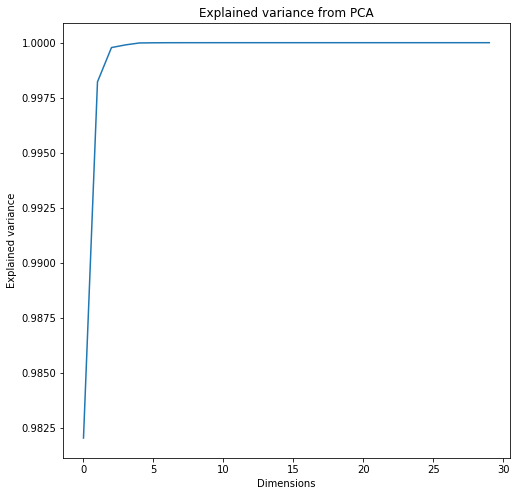

In [41]:
result = pca_reduction(features, p=0.95)

## Deep Learning: Baby steps

In [42]:
import keras

Using TensorFlow backend.


In [43]:
from IPython.display import Image
import pandas as pd
import numpy as np
import mxnet as mx
from mxnet import nd, autograd, gluon
mx.random.seed(1)
#import OpenSSL.SSL
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt; plt.rcParams['figure.figsize'] = (10, 5)
import pylab
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, Imputer, QuantileTransformer

# This import is needed to suppress warnings, not sure why thera are warnings.
import warnings
warnings.simplefilter('error')

# Set the context: Run computation on cpus
data_ctx = mx.cpu() # data
model_ctx = mx.cpu() # parameters

#from keras import optimizers
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras import regularizers
#from sklearn.metrics import mean_squared_error
from IPython.display import IFrame

### Neural Networks
Neural networks consist of layers of so called neurons or more commonly known as units. These units compute a linear combination of its inputs and perform a transformation with the help of an activation funtion.


#### Diagram of a unit in a neural network
![title](images/neuron-diagram-01.png)

For each unit in the NN compute a linear combination +  transformation:
\begin{equation}
y_k = f\bigg(\sum_{i=1}^{N}w_{ki}x_i + b_k\bigg)
\end{equation}
where $f(\cdot)$ is the activation function.

![title](images/activation.png)

### Deep Neural Networks
The essence of deep learning is to stack layers of computing units (neurons) on top of each other. The output is a composition of all layers, which we denote as $\hat{y}$.


<img src="images/multilayer-perceptron.png" style="width: 400px;" style="hight: 400px;"/>

### Type of loss function
In supervised learning there are two types of learning:
* Regression
* Classification

#### Regression
In regression the goal is to minimize the mean squared error:
\begin{equation}
L(y, \hat{y}) = \sum_{i=1}^n (\hat{y}_i - y_i)^2 
\end{equation}

#### Classification
In classification we can use many different losses, two common examples being for binary classification:
\begin{equation}
L(y, f(\mathbf{x}, \theta)) = - \sum_{n=1}^N {y_n \log f_n + (1 - y_n)\log (1 - f_n).}
\end{equation}

and for multilabel classification:
\begin{equation}
L(y, f(\mathbf{x}, \mathbf{\theta})) = -\sum_{n=1}^N \sum_{k=1}^Ky_{kn}\log f_k(\mathbf{x}_n, \mathbf{\theta})
\end{equation}

where $\log$ is the natural logarithm in base $e$.


### Optimization with Gradient Descent
We optimize deep neural networks with the help of gradient descent. Gradient descent finds the optimal values for the parameters of the model, whose predictions are the most similar to the target values. This is done by minimizing the cost or objective function. The objective function is a function of the loss function, i.e. it is a functional. Theoretically it is expressed as:
\begin{equation}
J(\theta) = \int L(y, \hat{y}(x, \theta))dF(x, y)
\end{equation}
where $F(x, y)$ is the joint distribution. In practice we have to rely on the emperical risk:
\begin{equation}
J(\theta)\approx \mathbb{E}_{p}[L(y(x, \theta), y)] = \frac{1}{m}\sum_{i=1}^m L(\hat{y}(x^{(i)}, \theta), y_i).
\end{equation}


In order to use gradient descent, we need to compute the gradients (multidimensional derivatives). For that we make use of backpropagation.

Note: We leave the derivation of the backpropagation or to search the internet for its derivation to the interested attendee. 

We are lucky there are plenty of deep learning framworks that can compute the gradient with backpropagation with the help of automatic differentiation! Imagine doing that for ResNet! 

When the gradients $\Delta J(\mathbf{w^{(t)}})$ of the cost function are computed, they are used in the gradient descent rule.

#### Gradient descent learning rule
\begin{equation}
\mathbf{w}^{(t+1)} = \mathbf{w^{(t)}} - \eta \Delta J(\mathbf{w^{(t)}})
\end{equation}

<img src="images/gradient_descent.png" style="width: 600px;" style="hight: 600px;"/>


This was in escence deep learning!

### Why is deep learning so successful?
* First we have abundance of data like never before.
* Computations can be done much faster thanks to new hardware like GPUs. This allow us to iterate and experiment with new architectures and optimization methods.
* There are some theoretical results that assert that neural networks, under certain conditions can approximate any non-linear function.
* Deep learning is still in its infancy and many, much too many results are results of experimentation, so far it is an emperical field. This means that it is very hard to have well defined rules on how to implement algorithms to different projects. 
* But many times we can make use of results of others and get quite good results.
* An example is to use trained parameters from other similar problems, often in the same field. This is called transfer learning and it helps in situations where we do not have too big data sets. Transfer learning is very successful in computer vision, no clear if it applies to sequential models. Sequential models will be discussed in next section.



### Recurrent Neural Networks
Recurrent neural networks or RNNs as they are often referred to, are specially designed for sequences. They were first invented to analyze time series. 

RNNs differ from NN in a very important point, they have recurrent connections. These recurrent connections make it theoretically possible for RNNs to preserve past history in the data, see fig.

![title](images/rnn.jpg)

It is common to unroll the network in time as shown in the right part of the above picture. The network's computation are as follows:
\begin{align}
\mathbf{s}_t &= f(\mathbf{W}^T\mathbf{s}_{t-1} + \mathbf{U}^T \mathbf{x} + \mathbf{b})\\
\mathbf{o}_t &= g(\mathbf{V}^T\mathbf{s}_t)
\end{align}
One very serious problem with RNNs is when computing the gradients. Its derivatives will be multiplied by $\mathbf{W}$ and $\mathbf{V}$ (these will not be derived here) which will make the gradients to either grow without bound or to go to zero. The problem is that the same weights are used in each time step, in FNN we have different sets of weights, still this can also happen in those networks, but in RNNs the problem is more serious.

### Gradient Clipping
For the growing gradients there is a solution, it is called gradient clipping:
\begin{align}
\hat{g} &\leftarrow \frac{\partial L}{\partial \theta}\\
\text{if} \hspace{5px} \Vert \hat{g} \Vert \geq \delta:\\
\hat{g} &\leftarrow \frac{\delta}{\Vert \hat{g} \Vert}\hat{g}\\
\end{align}

For the vanishing gradient problem there is no solution for the vanilla RNN. In 1997 Sepp Hochreiter and Jürgen Schmidhuber invented the Long Short Term Memory network (LSTM).

### Long Short Term Memory (LSTM)
The LSTM is a gated network with 4 gates controlling the flow of the gradients. In 1997 the LSTM only had 3 gates, the forget gate was implemented much later in the 2000s.

In a LSTM network is a variant of RNN where the units are replaced by LSTM cells. Each cell has the following components:
* An input node
* An input gate
* An internal state with a unit weight recurrent connection
* A forget gate
* An output gate

<img src="images/lstm_cell.png" style="width: 500px;" style="hight: 500px;"/>

The LSTM is described by:
\begin{align}
f_t &= \sigma_g(W_f x_t + U_f h_{t-1} + b_f)\\
i_t &= \sigma_g(W_i x_t + U_i h_{t-1} + b_i)\\
o_t &= \sigma_g(W_o x_t + U_o h_{t-1} + b_o)\\
\tilde{c}_t &= \sigma_c(W_c x_t + U_c h_{t-1} + b_c)\\
c_t &= f_t \odot c_{t-1} + i_t \odot \tilde{c}_t
\end{align}

The parameters in all these components in each cell is learned by gradient descent. The gradients are computed by Back propagation through time (BPTT). The BPTT will not be derived here as it is more involved than regular backpropagation. It is similar to backpropagation with the addition that we also iterate through the time steps in the unrolled LSTM graph.

# Practical Deep Learning, Frameworks and Applications
### Deep Learning Framworks
* tensorflow
* Keras
* pytorch
* CNTK
* MXNet
* etc

### Linear Regression with MXNet
Estimate the parameters $\mathbf{w}$ and $b$ with a linear model of the form:
\begin{equation}
\hat{y} = \sum_{i=1}^n w_i x_i + b = \mathbf{w} \cdot \mathbf{X}^T + b
\end{equation}

To assess how well our predictions are with respect to the true targets we use the square loss:
\begin{equation}
L(y, \hat{y}) = \sum_{i=1}^n (\hat{y}_i - y_i)^2 
\end{equation}




Linear regression can be depicted as a Neural Network as in the picture below:

![title](images/onelayer.png)







Images from MXNet: http://gluon.mxnet.io/chapter02_supervised-learning/linear-regression-scratch.html

### Baby steps deep learning with MXNet
As an introduction to both MXNet and Deep Learning let's code a linear regression node from scratch.

We will be working with MXNet's NDArray data structure. It is very similar to numpy's multidimensional array, but with a few advantages.
* support for asynchronous computation on CPU, GPU and distributed architectures
* support for automatic differentiation

In [44]:
num_inputs = 2
num_outputs = 1
num_examples = 10000

def real_fn(x):
    return 2 * x[:, 0] - 3.4 * x[:, 1] + 4.2

# ctx is the context
x = nd.random.normal(shape=(num_examples, num_inputs), ctx=data_ctx)
print('shape of x:', x.shape)
noise = 0.1 * nd.random_normal(shape=(num_examples, ), ctx=data_ctx)
y = real_fn(x) + noise
print('shape of y:', y.shape)
print(x[0])
print(y[0])

# Test that random points give predictions near the target,
# when using the optimal parameters
print('')
pred = 2 * x[0, 0] - 3.4 * x[0, 1] + 4.2
print('target', y[0])
print()
print('prediction', pred)

shape of x: (10000, 2)
shape of y: (10000,)

[ 0.03629481 -0.49024427]
<NDArray 2 @cpu(0)>

[ 6.00964451]
<NDArray 1 @cpu(0)>

target 
[ 6.00964451]
<NDArray 1 @cpu(0)>

prediction 
[ 5.93941975]
<NDArray 1 @cpu(0)>


### Plotting one feature against the target


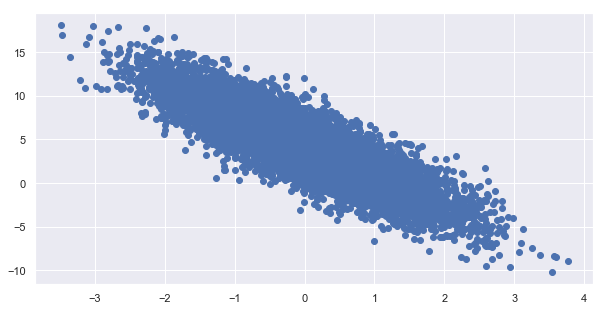

In [45]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 1].asnumpy(), y.asnumpy())
plt.show()

### Data iterators
In order to use data iterators the data has to be loaded into an ArrayDataset instance. 
X can be multidimensional but they have to have equal length along the first dimension: `len(X) == len(y)`



In [46]:
# Shuffle data in this example
batch_size = 2**3
train_data = gluon.data.DataLoader(gluon.data.ArrayDataset(x, y),
                                  batch_size=batch_size, shuffle=True)
for i, (data, label) in enumerate(train_data):
    print(data, label)
    break


[[ 0.26780456 -1.67931318]
 [ 2.24257898 -0.18460576]
 [ 1.28861916  0.30207178]
 [ 0.4893564   0.73895556]
 [-0.17773123 -0.0660857 ]
 [-1.82147706 -0.20881586]
 [-1.15742648  0.92696738]
 [ 1.37804747  0.04851014]]
<NDArray 8x2 @cpu(0)> 
[ 10.64461899   9.19611549   5.89936686   2.83811069   4.08531427
   1.31668639  -1.27852547   6.75947428]
<NDArray 8 @cpu(0)>


In [47]:
# How many batches?
counter = 0
for i, (data, label) in enumerate(train_data):
    pass
print(i + 1)

1250


### Model parameters
The parameters are initialized on `model_ctx`

In [48]:
w = nd.random_normal(shape=(num_inputs, num_outputs), ctx=model_ctx)
b = nd.random_normal(shape=num_outputs, ctx=model_ctx)
params = [w, b]

In [49]:
# Allocate memory for each gradient
for param in params:
    param.attach_grad()

## Neural networks
The function `net(x)` is just a representation of a linear neuron

In [50]:
def net(x):
    return mx.nd.dot(x, w) + b

## Loss function

In [51]:
def square_loss(yhat, y):
    return nd.mean((yhat - y) ** 2)

## Optimizer
Optimization done with gradient descent
* `param[:]` is used to update parameters in place!

In [52]:
def SGD(params, lr):
    for param in params:
        param[:] = param - lr * param.grad

## Training loop
* compute predictions for `yhat` and compute the loss
* compute gradients by invoking `loss.backward()`
* update model parameters

In [53]:
def plot_loss(losses, x, sample_size=100):
    xs = list(range(len(losses)))
    f, (fg1, fg2) = plt.subplots(1, 2)
    fg1.set_title('Loss during training')
    fg1.plot(xs, losses, '-r')
    fg2.set_title('Estimated vs real function')
    fg2.plot(x[:sample_size, :].asnumpy(),
            net(x[:sample_size, :]).asnumpy(), 'or', 
             label='Estimated')
    fg2.plot(x[:sample_size, 1].asnumpy(),
            real_fn(x[:sample_size, :]).asnumpy(), '*g', label='Real')
    fg2.legend()
    plt.show()
    

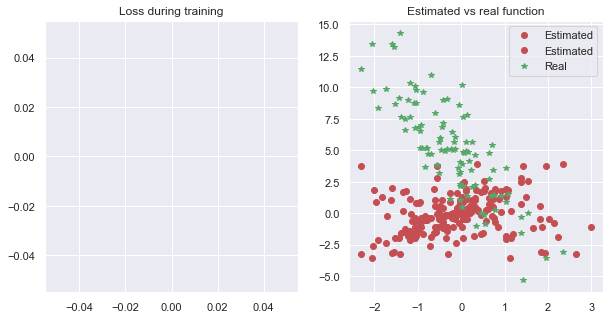

epoch: 0 cumulative loss: 36.50974605064392
epoch: 1 cumulative loss: 22.077373987007142
epoch: 2 cumulative loss: 13.352153511714935
epoch: 3 cumulative loss: 8.077110199570656
epoch: 4 cumulative loss: 4.887902958273887
epoch: 5 cumulative loss: 2.9596120040655136
epoch: 6 cumulative loss: 1.7936903245925904
epoch: 7 cumulative loss: 1.0886988264918327
epoch: 8 cumulative loss: 0.6624165163427591
epoch: 9 cumulative loss: 0.40463748498559


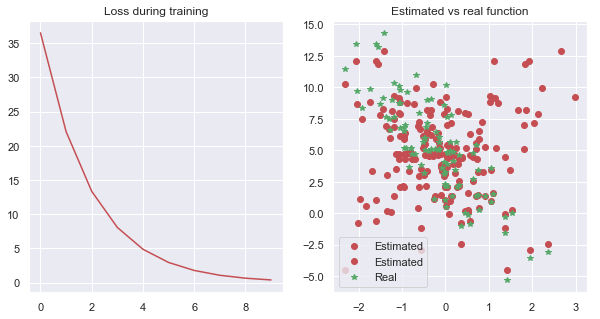

In [54]:
epochs = 10
learning_rate = 0.0001
num_batches = num_examples/batch_size
losses = []
plot_loss(losses, x)

for e in range(epochs):
    cumulative_loss = 0
    for _, (data, label) in enumerate(train_data):
        # check data and parameters in same context!
        data = data.as_in_context(model_ctx)
        label = label.as_in_context(model_ctx).reshape((-1, 1))
        with autograd.record():
            output = net(data)
            loss = square_loss(output, label)
        loss.backward()
        SGD(params, learning_rate)
        cumulative_loss += loss.asscalar()
    print('epoch: {} cumulative loss: {}'.format(e, 
                                          cumulative_loss/num_batches))
    losses.append(cumulative_loss/num_batches)
plot_loss(losses, x)

In [55]:
print('weights:', params[0].shape)
print(params[0])
print('')
print('bias:', params[1].shape)
print(params[1])

weights: (2, 1)

[[ 1.79581523]
 [-2.98437643]]
<NDArray 2x1 @cpu(0)>

bias: (1,)

[ 3.90203238]
<NDArray 1 @cpu(0)>
